Problem 3
----------
Use Python/sklearn to perform a TSNE dimensionality reduction (to two dimensions) on the 
numerical columns from the dataset


/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 129'. Pick better value with 'binwidth'.


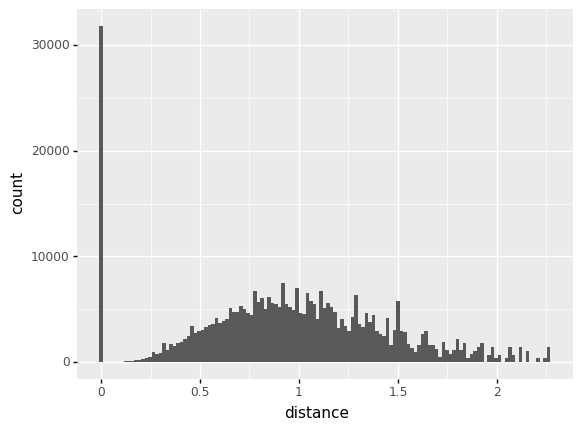

<ggplot: (8787088133446)>

In [8]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from plotnine import *

import pandas as pd

heroes = pd.read_csv("hw_data/datasets_38396_60978_charcters_stats.csv");

heroes = heroes.drop(['Name', 'Alignment', 'Total'], axis=1);

mms = MinMaxScaler();

normed = mms.fit_transform(heroes)
distances = pairwise_distances(normed)


(ggplot(pd.DataFrame({"distance":distances.reshape(np.product(distances.shape))}),
       aes("distance")) + geom_histogram())



Problem 4
---------
Reproduce your plot in Python with plotnine (or the library of your choice)

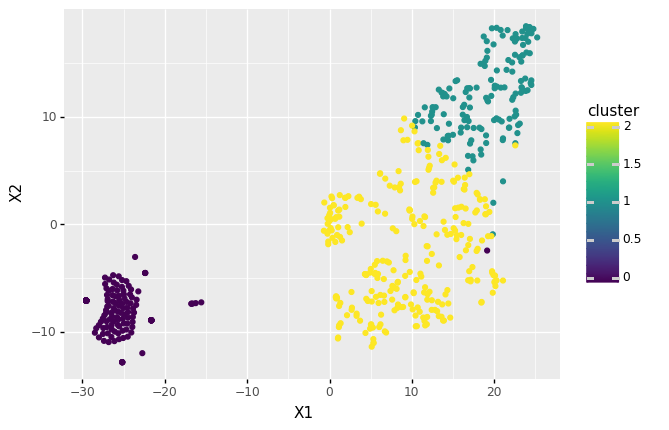

<ggplot: (8786939311047)>

In [13]:
from sklearn.manifold import TSNE

projection = TSNE(n_components=2).fit_transform(normed);
lowd = pd.DataFrame(projection, columns=["X1","X2"]);
lowd["cluster"] = heroes["cluster"];


(ggplot(lowd,aes("X1","X2")) + geom_point(aes(color="cluster")))


Problem 3
-----------
Once you’ve performed the analysis in Python (feel free to use a Python notebook) write the results to a csv file and load them into R. In R, plot the results.

In [12]:
lowd.to_csv('hw_data/lowd.csv')